In [1]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np 

In [2]:
# Chemin vers le fichier NetCDF
chemin_fichier_nc = 'data/adaptor.mars.internal.nc'

# Chargement du fichier NetCDF
data = Dataset(chemin_fichier_nc, 'r')
print(data.variables.keys())

dict_keys(['longitude', 'latitude', 'level', 'time', 't'])


### Données pour un intervalle de temps entre octobre jusqu'à décembre 2023

In [3]:
print(data.variables.values())

dict_values([<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (353,)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (161,)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 'netCDF4._netCDF4.Variable'>
int32 level(level)
    units: millibars
    long_name: pressure_level
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (1607,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
int16 t(time, level, latitude, longitude)
    scale_factor: 0.0013

In [4]:
print(data.variables['t'])

<class 'netCDF4._netCDF4.Variable'>
int16 t(time, level, latitude, longitude)
    scale_factor: 0.0013635610432852056
    add_offset: 270.7503710759237
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: Temperature
    standard_name: air_temperature
unlimited dimensions: 
current shape = (1607, 2, 161, 353)
filling on


In [5]:
print(data.variables['time'][:]) #timestamp

[1084752 1084753 1084754 ... 1086356 1086357 1086358]


In [6]:
times = data.variables['time']

### Référence Unité de date par défaut 

In [7]:
times_unit = data.variables["time"].units
print(times_unit) 

hours since 1900-01-01 00:00:00.0


In [8]:
temp_unit = data.variables['t'].units
print(temp_unit)

K


In [9]:
temp = data.variables['t']
print(temp)

<class 'netCDF4._netCDF4.Variable'>
int16 t(time, level, latitude, longitude)
    scale_factor: 0.0013635610432852056
    add_offset: 270.7503710759237
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: Temperature
    standard_name: air_temperature
unlimited dimensions: 
current shape = (1607, 2, 161, 353)
filling on


#### Transformer les données sous format date XXXX-XX-XX

In [10]:
import datetime
ref_date = datetime.date(int(times_unit[12:16]),int(times_unit[17:19]),int(times_unit[20:22]))
print(ref_date) 

1900-01-01


Conversion de données sur le temps en années jusqu'en heures 

In [11]:
print(int(times[0])) #1084752 heures => 1458 mois =>  121 années 

1084752


Date intiale pour trouver la date du début sur le dataset

In [12]:
start_date = ref_date + datetime.timedelta(hours=int(times[0]))
print(start_date)

2023-10-01


Date de fin (qui ne prend pas les 6 derniers jours derriere)

In [13]:
end_date = ref_date + datetime.timedelta(hours=int(times[-1]))
print(end_date)

2023-12-06


In [14]:
next_date = end_date + datetime.timedelta(days=1)
print(next_date)

2023-12-07


In [15]:
date_range = pd.date_range(start= start_date,end = end_date,freq="H")
print(date_range)
print(type(date_range))

DatetimeIndex(['2023-10-01 00:00:00', '2023-10-01 01:00:00',
               '2023-10-01 02:00:00', '2023-10-01 03:00:00',
               '2023-10-01 04:00:00', '2023-10-01 05:00:00',
               '2023-10-01 06:00:00', '2023-10-01 07:00:00',
               '2023-10-01 08:00:00', '2023-10-01 09:00:00',
               ...
               '2023-12-05 15:00:00', '2023-12-05 16:00:00',
               '2023-12-05 17:00:00', '2023-12-05 18:00:00',
               '2023-12-05 19:00:00', '2023-12-05 20:00:00',
               '2023-12-05 21:00:00', '2023-12-05 22:00:00',
               '2023-12-05 23:00:00', '2023-12-06 00:00:00'],
              dtype='datetime64[ns]', length=1585, freq='H')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [16]:
df = pd.DataFrame(date_range,columns = ["Date-Time"])
df["Date-Time"] = date_range
#df = df.set_index(["Date-Time"])
#print(df)

In [17]:
print(df)

               Date-Time
0    2023-10-01 00:00:00
1    2023-10-01 01:00:00
2    2023-10-01 02:00:00
3    2023-10-01 03:00:00
4    2023-10-01 04:00:00
...                  ...
1580 2023-12-05 20:00:00
1581 2023-12-05 21:00:00
1582 2023-12-05 22:00:00
1583 2023-12-05 23:00:00
1584 2023-12-06 00:00:00

[1585 rows x 1 columns]


In [18]:
#print(type(df["Date-Time"]))
df["days"] =  df["Date-Time"].dt.day
df["month"] =  df["Date-Time"].dt.month
#df["year"] =  df["Date-Time"].dt.year  #Plus tard si on souhaite prendre plusieurs années
df["hour"] = df["Date-Time"].dt.hour

print(df)

               Date-Time  days  month  hour
0    2023-10-01 00:00:00     1     10     0
1    2023-10-01 01:00:00     1     10     1
2    2023-10-01 02:00:00     1     10     2
3    2023-10-01 03:00:00     1     10     3
4    2023-10-01 04:00:00     1     10     4
...                  ...   ...    ...   ...
1580 2023-12-05 20:00:00     5     12    20
1581 2023-12-05 21:00:00     5     12    21
1582 2023-12-05 22:00:00     5     12    22
1583 2023-12-05 23:00:00     5     12    23
1584 2023-12-06 00:00:00     6     12     0

[1585 rows x 4 columns]


In [19]:
list_hour = df["hour"].tolist()
list_days = df["days"].tolist()
list_month = df["month"].tolist()
    
print("Liste des heures",list_hour)
print("Liste des jours",list_days)
print("Liste des mois",list_month)


Liste des heures [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

In [20]:
#print(data['t'][:])
#df["Temperature"] = data['t'][0]
print(data['t'][0][0][0])

[247.42938655 247.3925704  247.35984494 247.3298466  247.31075674
 247.30121181 247.29575757 247.29439401 247.29575757 247.30121181
 247.3121203  247.32575591 247.33939152 247.35984494 247.38438904
 247.41438738 247.44302216 247.47302051 247.50438241 247.53710788
 247.57256046 247.60801305 247.64210208 247.6761911  247.70618944
 247.73073354 247.7498234  247.76618613 247.78391242 247.80436584
 247.82481926 247.84799979 247.87663457 247.90526936 247.93390414
 247.95844824 247.98299234 248.00617287 248.02526273 248.04435258
 248.064806   248.09071366 248.11798488 248.14116542 248.16025527
 248.17252732 248.17934513 248.18616293 248.18889005 248.19570786
 248.20661635 248.2257062  248.25570454 248.29388425 248.33615465
 248.3797886  248.42342255 248.46432938 248.50250909 248.533871
 248.56114222 248.58841344 248.61568466 248.64704656 248.67431779
 248.70431613 248.73567803 248.77113062 248.80794677 248.84612648
 248.88430619 248.92657658 248.97293765 249.01793517 249.06293268
 249.1052030

In [21]:
print(data['level'][0]) #Pression 500ha
print(data['level'][1]) #Pression 1000ha

500
1000


In [22]:
print(data.variables['longitude']) 

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (353,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [23]:
print(data['longitude'][:])  #Coordonnées Longitude 

[-108.   -107.75 -107.5  -107.25 -107.   -106.75 -106.5  -106.25 -106.
 -105.75 -105.5  -105.25 -105.   -104.75 -104.5  -104.25 -104.   -103.75
 -103.5  -103.25 -103.   -102.75 -102.5  -102.25 -102.   -101.75 -101.5
 -101.25 -101.   -100.75 -100.5  -100.25 -100.    -99.75  -99.5   -99.25
  -99.    -98.75  -98.5   -98.25  -98.    -97.75  -97.5   -97.25  -97.
  -96.75  -96.5   -96.25  -96.    -95.75  -95.5   -95.25  -95.    -94.75
  -94.5   -94.25  -94.    -93.75  -93.5   -93.25  -93.    -92.75  -92.5
  -92.25  -92.    -91.75  -91.5   -91.25  -91.    -90.75  -90.5   -90.25
  -90.    -89.75  -89.5   -89.25  -89.    -88.75  -88.5   -88.25  -88.
  -87.75  -87.5   -87.25  -87.    -86.75  -86.5   -86.25  -86.    -85.75
  -85.5   -85.25  -85.    -84.75  -84.5   -84.25  -84.    -83.75  -83.5
  -83.25  -83.    -82.75  -82.5   -82.25  -82.    -81.75  -81.5   -81.25
  -81.    -80.75  -80.5   -80.25  -80.    -79.75  -79.5   -79.25  -79.
  -78.75  -78.5   -78.25  -78.    -77.75  -77.5   -77.25  -77.

In [24]:
print(data['latitude'][:]) #Coordonnées Latitude

[60.   59.75 59.5  59.25 59.   58.75 58.5  58.25 58.   57.75 57.5  57.25
 57.   56.75 56.5  56.25 56.   55.75 55.5  55.25 55.   54.75 54.5  54.25
 54.   53.75 53.5  53.25 53.   52.75 52.5  52.25 52.   51.75 51.5  51.25
 51.   50.75 50.5  50.25 50.   49.75 49.5  49.25 49.   48.75 48.5  48.25
 48.   47.75 47.5  47.25 47.   46.75 46.5  46.25 46.   45.75 45.5  45.25
 45.   44.75 44.5  44.25 44.   43.75 43.5  43.25 43.   42.75 42.5  42.25
 42.   41.75 41.5  41.25 41.   40.75 40.5  40.25 40.   39.75 39.5  39.25
 39.   38.75 38.5  38.25 38.   37.75 37.5  37.25 37.   36.75 36.5  36.25
 36.   35.75 35.5  35.25 35.   34.75 34.5  34.25 34.   33.75 33.5  33.25
 33.   32.75 32.5  32.25 32.   31.75 31.5  31.25 31.   30.75 30.5  30.25
 30.   29.75 29.5  29.25 29.   28.75 28.5  28.25 28.   27.75 27.5  27.25
 27.   26.75 26.5  26.25 26.   25.75 25.5  25.25 25.   24.75 24.5  24.25
 24.   23.75 23.5  23.25 23.   22.75 22.5  22.25 22.   21.75 21.5  21.25
 21.   20.75 20.5  20.25 20.  ]


In [25]:
print(type(data['latitude'][:]))

<class 'numpy.ma.core.MaskedArray'>


In [26]:
print(len(data['latitude']))
print(len(data['longitude']))

161
353


In [27]:
import numpy as np
import csv

# Création des données de latitude et de longitude initiales (exemples)
latitude = data['latitude'][:]
longitude = data['longitude'][:]

# Écriture des données de latitude et de longitude dans un même fichier CSV
fichier_lat_long = 'data/nouvelles_coordonnees.csv'

with open(fichier_lat_long, 'w', newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(['Latitude', 'Longitude'])
    for lat, lon in zip(latitude, longitude):
        csv_writer.writerow([lat, lon])

print(f"Données de latitude et longitude écrites dans : {fichier_lat_long}")

Données de latitude et longitude écrites dans : data/nouvelles_coordonnees.csv


In [28]:
#Valeurs Définies
# Latitudes ",
point_lat = np.arange(60, 19.75, -0.25)

# Longitudes
point_long = np.arange(-108, -19.75, 0.25)

long = data['longitude'][:]
lat = data['latitude'][:]

diff_long = []
diff_lat = []

In [29]:
print(point_long )

[-108.   -107.75 -107.5  -107.25 -107.   -106.75 -106.5  -106.25 -106.
 -105.75 -105.5  -105.25 -105.   -104.75 -104.5  -104.25 -104.   -103.75
 -103.5  -103.25 -103.   -102.75 -102.5  -102.25 -102.   -101.75 -101.5
 -101.25 -101.   -100.75 -100.5  -100.25 -100.    -99.75  -99.5   -99.25
  -99.    -98.75  -98.5   -98.25  -98.    -97.75  -97.5   -97.25  -97.
  -96.75  -96.5   -96.25  -96.    -95.75  -95.5   -95.25  -95.    -94.75
  -94.5   -94.25  -94.    -93.75  -93.5   -93.25  -93.    -92.75  -92.5
  -92.25  -92.    -91.75  -91.5   -91.25  -91.    -90.75  -90.5   -90.25
  -90.    -89.75  -89.5   -89.25  -89.    -88.75  -88.5   -88.25  -88.
  -87.75  -87.5   -87.25  -87.    -86.75  -86.5   -86.25  -86.    -85.75
  -85.5   -85.25  -85.    -84.75  -84.5   -84.25  -84.    -83.75  -83.5
  -83.25  -83.    -82.75  -82.5   -82.25  -82.    -81.75  -81.5   -81.25
  -81.    -80.75  -80.5   -80.25  -80.    -79.75  -79.5   -79.25  -79.
  -78.75  -78.5   -78.25  -78.    -77.75  -77.5   -77.25  -77.

Lorsque vous faites latitude - point_lat[:, None], la partie [:, None] ajoute une nouvelle dimension à point_lat, transformant sa forme de (m,) en (m, 1), ce qui lui permet d'être compatible pour la soustraction avec latitude qui a la forme (n,). Cela permet à NumPy de diffuser les valeurs correctement pour effectuer la soustraction élément par élément.

Ainsi, l'ajout de None (ou np.newaxis) dans ce contexte permet d'adapter les dimensions des tableaux pour que les opérations arithmétiques puissent être effectuées conformément aux règles de diffusion (broadcasting) de NumPy.

In [30]:
import numpy as np

# Supposons que data['latitude'][:] et data['longitude'][:] sont vos données de latitude et longitude respectivement
# Déclaration des variables
point_lat = np.arange(60, 19.75, -0.25)
point_long = np.arange(-108, -19.75, 0.25)
# Exemple de données pour latitude et longitude
latitude = data['latitude'][:]
longitude = data['longitude'][:]

# Calcul des différences au carré
diff_lat = np.around((latitude - point_lat[:, None])**2,decimals=2)  # Calcul de la différence entre latitude et point_lat
diff_long = np.around((longitude - point_long[:, None])**2,decimals=2)  # Calcul de la différence entre longitude et point_long

In [31]:
# Affichage des différences au carré
print("Différences au carré pour la latitude :")
print(diff_lat)


Différences au carré pour la latitude :
[[0.00000e+00 6.00000e-02 2.50000e-01 ... 1.56025e+03 1.58006e+03
  1.60000e+03]
 [6.00000e-02 0.00000e+00 6.00000e-02 ... 1.54056e+03 1.56025e+03
  1.58006e+03]
 [2.50000e-01 6.00000e-02 0.00000e+00 ... 1.52100e+03 1.54056e+03
  1.56025e+03]
 ...
 [1.56025e+03 1.54056e+03 1.52100e+03 ... 0.00000e+00 6.00000e-02
  2.50000e-01]
 [1.58006e+03 1.56025e+03 1.54056e+03 ... 6.00000e-02 0.00000e+00
  6.00000e-02]
 [1.60000e+03 1.58006e+03 1.56025e+03 ... 2.50000e-01 6.00000e-02
  0.00000e+00]]


In [32]:
print("\nDifférences au carré pour la longitude :")
print(diff_long)


Différences au carré pour la longitude :
[[0.00000e+00 6.00000e-02 2.50000e-01 ... 7.65625e+03 7.70006e+03
  7.74400e+03]
 [6.00000e-02 0.00000e+00 6.00000e-02 ... 7.61256e+03 7.65625e+03
  7.70006e+03]
 [2.50000e-01 6.00000e-02 0.00000e+00 ... 7.56900e+03 7.61256e+03
  7.65625e+03]
 ...
 [7.65625e+03 7.61256e+03 7.56900e+03 ... 0.00000e+00 6.00000e-02
  2.50000e-01]
 [7.70006e+03 7.65625e+03 7.61256e+03 ... 6.00000e-02 0.00000e+00
  6.00000e-02]
 [7.74400e+03 7.70006e+03 7.65625e+03 ... 2.50000e-01 6.00000e-02
  0.00000e+00]]


In [33]:
min_index_lat = diff_lat.argmin()
min_index_lon = diff_long.argmin()
print(min_index_lat)
print(min_index_lon)

0
0


### Script FINAL


In [41]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np  
import os 
import datetime

point_lat = np.arange(60, 19.75, -0.25)
point_long = np.arange(-108, -19.75, 0.25)

# Chemin vers le fichier NetCDF
chemin_fichier_nc = 'data/adaptor.mars.internal.nc'

# Chargement du fichier NetCDF
data = Dataset(chemin_fichier_nc, 'r')

times = data.variables['time'][:]
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
unit = data.variables['time'].units
unitt = data.variables['t'].units

# Calcul des différences au carré
diff_lat = np.around((latitude - point_lat[:, None])**2,decimals=2)  # Calcul de la différence entre latitude et point_lat
diff_long = np.around((longitude - point_long[:, None])**2,decimals=2)  # Calcul de la différence entre longitude et point_long

#Minim
min_index_lat = diff_lat.argmin()
min_index_lon = diff_long.argmin()

ref_date = datetime.datetime(int(times_unit[12:16]),int(times_unit[17:19]),int(times_unit[20:22]))
date_range = list()
temp_data_500 = list()
temp_data_1000 = list()
for index, time, in enumerate(times):
    date_time = ref_date + datetime.timedelta(hours=int(time))
    date_range.append(date_time) 
    temp_data_500.append(temp[index,0,min_index_lat,min_index_lon])
    temp_data_1000.append(temp[index,1,min_index_lat,min_index_lon])
print(temp_data_500)
print(temp_data_1000)
df = pd.DataFrame(date_range,columns = ["Date-Time"])
df["Date-Time"] = date_range
df = df.set_index(["Date-Time"])
df["Température à 500hPa ({})".format(unitt)] = temp_data_500
df["Température à 1000hPa ({})".format(unitt)] = temp_data_1000

[247.42938655261682, 247.5316536308632, 247.678918223538, 247.8534540370785, 248.01571780122944, 248.07162380400413, 248.02662628957574, 247.9448126269786, 247.74982339778884, 247.5575612906856, 247.4048424538377, 247.39529752653468, 247.46074845661238, 247.58892319468117, 247.736187787356, 247.84390910977552, 247.82481925516953, 247.688463150841, 247.54937992442592, 247.53029006981993, 247.62573934284987, 247.58210538946474, 247.25076005594644, 247.68300890666785, 249.46109250711177, 250.69238812919832, 251.67278851932036, 252.47592597381535, 253.2177031813625, 253.4467814366344, 253.57495617470323, 253.7999437468453, 254.06311102819933, 254.33582323685638, 254.06447458924262, 254.0576567840262, 253.9458447784768, 254.30582489390412, 255.0148766364124, 255.31349650489187, 255.45530685339352, 255.43758055983082, 255.37076606870986, 255.24531845272762, 255.25759050211718, 255.1825946447365, 255.17304971743349, 254.87170272686745, 254.61398968968655, 254.1585603012293, 253.43860007037472

In [42]:
print(df)

                     Température à 500hPa (K)  Température à 1000hPa (K)
Date-Time                                                               
2023-10-01 00:00:00                247.429387                 280.750728
2023-10-01 01:00:00                247.531654                 280.705730
2023-10-01 02:00:00                247.678918                 280.621189
2023-10-01 03:00:00                247.853454                 280.479379
2023-10-01 04:00:00                248.015718                 280.299389
...                                       ...                        ...
2023-12-06 18:00:00                243.394609                 273.009792
2023-12-06 19:00:00                243.360520                 273.131149
2023-12-06 20:00:00                243.344158                 273.262051
2023-12-06 21:00:00                243.265071                 273.140694
2023-12-06 22:00:00                243.337340                 273.470675

[1607 rows x 2 columns]


In [36]:
df.to_csv(os.path.join("./data","temp.csv"),index=True)

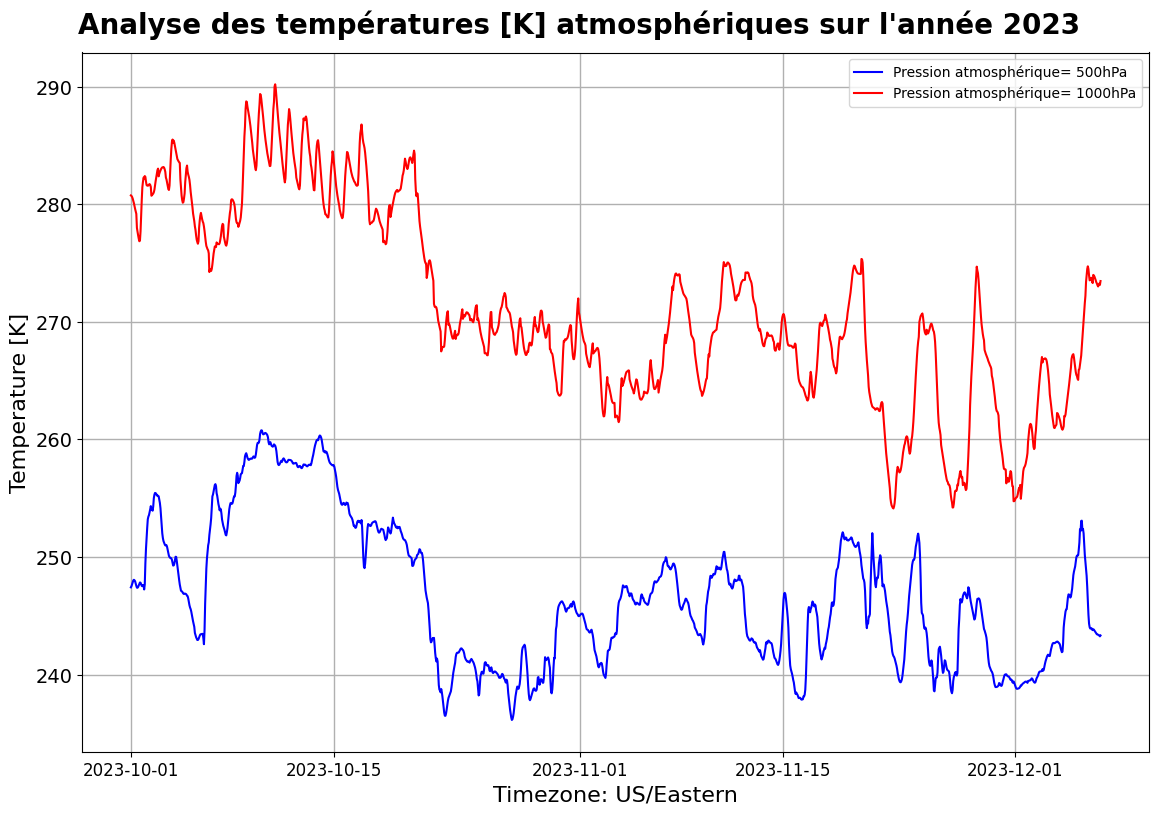

In [48]:
import matplotlib.pyplot as plt

Title = "Analyse des températures [K] atmosphériques sur l'année 2023"
fig, ax = plt.subplots(figsize=(11.69,8.27))
plt.grid(linestyle="-",linewidth=1.0)
fig.suptitle(Title,fontsize=20,weight='bold')
ax.plot(df.index,df["{}".format(df.columns[0])],color="blue",label='Pression atmosphérique= 500hPa')
ax.plot(df.index,df["{}".format(df.columns[1])],color="red",label='Pression atmosphérique= 1000hPa')
ax.set_xlabel("Timezone: US/Eastern", fontsize = 16) 
ax.set_ylabel(f"Temperature [{unitt}]",fontsize = 16)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(labelsize=14) 
fig.tight_layout()
plt.legend()
plt.show()